# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [43]:
# * import sys
# Import the sys module, which is a Python standard library module.
# This module provides access to variables and functions that interact strongly with the
# Python interpreter, such as manipulating module search path and input/output
# standard, among others.
# * sys.path
# It is a list containing the paths in which the Python interpreter looks for modules when
# you use import. When you try to import a module, Python searches the paths specified in this
# list.
# * sys.path.insert(0, '..')
# Insert the path '..' (representing the parent directory) at the beginning of the sys.path list.
# Adding it in position 0 ensures that when Python looks for modules to import,
# first check in the parent directory before continuing with the default paths.

import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [44]:
# * from python_environment_check import check_packages
# Import the check_packages function from the python_environment_check module. 
# This module, from its name, appears to be designed to verify that the Python environment 
# have the correct versions of certain packages installed.
# * d = {...}
# Defines a dictionary d that contains the names of several packages as keys 
# (e.g. numpy, scipy, matplotlib, etc.) and as values ​​the minimum versions 
# required from those packages.
# * check_packages(d)
# The check_packages function takes as input the dictionary d and probably performs a 
# check on current Python environment to ensure installed versions 
# of these packages are at least those specified in the dictionary. If any of the packages 
# is not installed or has the wrong version, the function may throw an error or 
# suggest installing/updating the packages.

from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2',
}
check_packages(d)

[OK] numpy 1.24.3
[OK] scipy 1.8.0
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


# Example 14 - DBSCAN High Density Locating Regions Exercise

### Overview

- [Importing libraries for data analysis and scaling](#importing-libraries-for-data-analysis-and-scaling)
- [Extracting the principal components step by step](#extracting-the-principal-components-step-by-step)
- [Locating regions of high density via DBSCAN](#locating-regions-of-high-density-via-dbscan)
- [Summary](#summary)

STATEMENT

In this exercise, you will perform an unsupervised analysis using DBSCAN on the data set provided in the 'dataset1.csv' file.

To do this, you will use the following instructions:

- Data normalization: Before applying the algorithm, make sure to normalize the data to improve the accuracy of the analysis.

- Cluster calculation with scikit-learn.

- Graphical representation with PCA: Perform a PCA to reduce the dimensionality of the data and represent the clusters in a two-dimensional graph.

In [45]:
# * from IPython.display
# Import from the display submodule of the IPython package. This module is designed to display 
# and render different types of data within interactive environments, such as Jupyter Notebooks.
# * import Image
# Import the Image class from the display module. The Image class is used to display 
# images in the interactive environment (for example, in a Jupyter Notebook cell).
# * %matplotlib inline
# This is a magic command specific to IPython/Jupyter Notebook.
# Enables display of matplotlib plots directly within cells of the 
# notebook. Graphics are rendered "inline" (within the same notebook) without the need 
# to open pop-up windows.

from IPython.display import Image
%matplotlib inline

## Importing libraries for data analysis and scaling

In [46]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Extracting the principal components step by step

In [47]:
# Download the wine dataset from the UCI Machine Learning Repository
df = pd.read_csv('dataset1.csv')

In [48]:
# Show the first five rows of the dataset
df.head()

,Col7,Col5,Col2,Col4,Col8,Col3,Col6,Col1,Target
0,20.8,0.733,48,9,22,120,72,56,0
1,32.0,0.444,42,1,29,100,66,196,0
2,34.8,0.217,24,1,45,112,80,132,0
3,31.0,0.874,21,0,16,113,80,0,0
4,26.2,0.313,41,6,30,80,66,0,0


In [49]:
# Show the shape of the dataset
df.shape

(768, 9)

In [50]:
# Splitting the dataset into features and target variable
X, y = df.iloc[:, 0:-1].values, df.iloc[:, -1].values # Target variable is the first column

## Locating regions of high density via DBSCAN

K-means and hierarchical clustering:

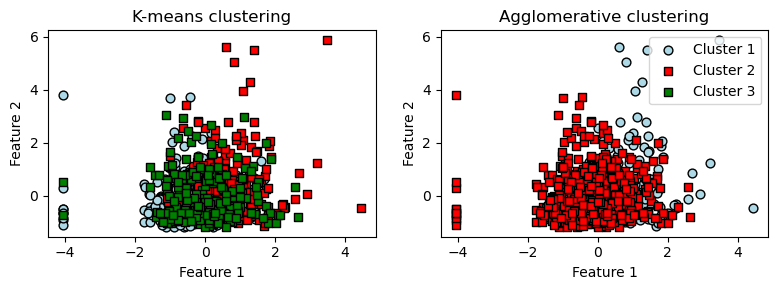

In [51]:
sc = StandardScaler()
X = sc.fit_transform(X)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=3, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')

ax1.scatter(X[y_km == 1, 0], 
            X[y_km == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')

ax1.scatter(X[y_km == 2, 0], 
            X[y_km == 2, 1],
            c='green',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 3')

ax1.set_title('K-means clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

ac = AgglomerativeClustering(n_clusters=2,
                             metric='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='Cluster 1')

ax2.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='Cluster 2')

ax2.scatter(X[y_ac == 2, 0],
            X[y_ac == 2, 1],
            c='green',
            edgecolor='black',
            marker='s',
            s=40,
            label='Cluster 3')

ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

Density-based clustering:

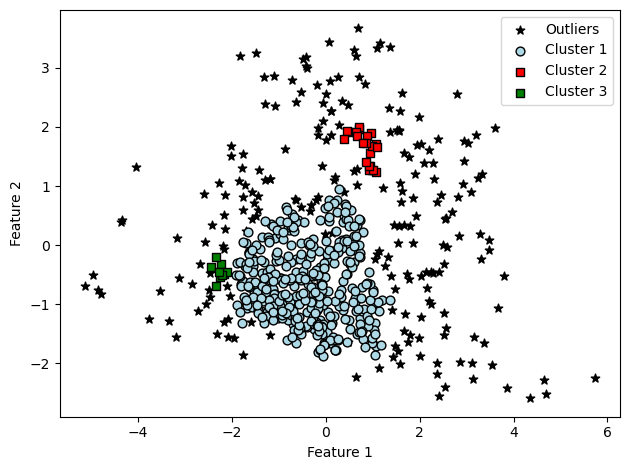

In [52]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db == -1, 0],
            X[y_db == -1, 1],
            c='black',
            edgecolor='black',
            marker='*',
            s=40,
            label='Outliers')

plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='Cluster 1')

plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='Cluster 2')

plt.scatter(X[y_db == 2, 0],
            X[y_db == 2, 1],
            c='green',
            edgecolor='black',
            marker='s',
            s=40,
            label='Cluster 3')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

# Summary

---

Readers may ignore the next cell.

In [53]:
# Run a command in the terminal from a Python environment (such as a Jupyter Notebook or a 
# script that allows system commands to convert a Jupyter notebook to a file Python script. 
# * !
# This symbol is used in environments such as Jupyter Notebooks to execute system commands 
# operational directly from the notebook. In this case, the command is an execution of a 
# Python Script.
# * python ../.convert_notebook_to_script.py
# This command runs a Python script called convert_notebook_to_script.py. This file 
# is located in the previous directory (../ indicates that it is one level up in the system 
# files). The purpose of this script is to convert a Jupyter notebook (.ipynb) into a 
# Python script file (.py).
# * --input ex14.ipynb
# This is an option or argument that tells the script what the input file is, in this 
# case, the notebook ex14.ipynb.
# * --output ex14.py
# This option tells the script to save the output (the converted file) with the name
# ex14.py, which is a Python script.

! python ../.convert_notebook_to_script.py --input ex14.ipynb --output ex14.py

[NbConvertApp] Converting notebook ex14.ipynb to script
[NbConvertApp] Writing 8757 bytes to ex14.py
